#Grasp-and-Lift EEG Detection (GAL)
https://www.kaggle.com/competitions/grasp-and-lift-eeg-detection/overview  


#Описание Данных  
**Эксперименты GAL:** Данные содержат записи ЭЭГ испытаний, в которых участники выполняли задачи по захвату и поднятию предметов.  

**Участники:** В исследовании участвуют 12 субъектов.  
**Структура Данных:**  
**Тренировочные Данные:** Первые 8 серий испытаний для каждого участника.  
**Тестовые Данные:** 9-я и 10-я серии испытаний.
#Задачи
**Обнаружение Событий:** Вам необходимо обнаружить шесть событий (HandStart, FirstDigitTouch, BothStartLoadPhase, LiftOff, Replace, BothReleased), которые всегда происходят в одном и том же порядке.  
**Формат Данных:**  
*Файлы _data.csv: Содержат сырые данные ЭЭГ (32 канала, частота дискретизации 500 Гц).  
*Файлы _events.csv: Содержат метки событий для тренировочных данных.  
#Ограничения и Рекомендации
**Исключение Утечки Данных:** При предсказании необходимо учитывать только данные, предшествующие моменту предсказания (не использовать будущие данные).  
**Структурирование Кода:** Рекомендуется организовать код так, чтобы было ясно, что вы не используете данные о будущих событиях.  
**Использование Пространственных Отношений:** Возможно использование пространственных отношений между местоположениями электродов.
#Шаги для Решения Задачи
**Предварительная Обработка Данных:** Очистка, нормализация и возможно агрегирование данных ЭЭГ.  
**Разработка Модели:** Создание модели машинного обучения или глубокого обучения, способной классифицировать события на основе данных ЭЭГ.  
**Валидация Модели:** Проверка эффективности модели на тренировочных данных.
Тестирование: Проверка модели на тестовых данных, учитывая ограничения по использованию будущих данных.

In [ ]:
# Импортируем библиотеки
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Подключим google disk на который загружены данные эксперимента /Colab Notebooks/mat_data/Z_EEG_1/
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Подготовим датасет из первой серии измерения для первого субъекта
train_set_signals = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/train/subj1_series1_data.csv")
train_set_labels = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/train/subj1_series1_events.csv")

test_data_9 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/test/subj1_series9_data.csv")
test_data_10 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/test/subj1_series10_data.csv")


In [ ]:
# Вывод информации о данных
print("Тренировочные данные (Data):")
print(train_set_signals.head())
print("\nТренировочные данные (Events):")
print(train_set_labels.head())
print("\nТестовые данные (Series 9):")
print(test_data_9.head())
print("\nТестовые данные (Series 10):")
print(test_data_10.head())


Тренировочные данные (Data):
                id  Fp1  Fp2   F7   F3   Fz   F4   F8  FC5  FC1  ...   P7  \
0  subj1_series1_0  -31  363  211  121  211   15  717  279   35  ...  536   
1  subj1_series1_1  -29  342  216  123  222  200  595  329   43  ...  529   
2  subj1_series1_2 -172  278  105   93  222  511  471  280   12  ...  511   
3  subj1_series1_3 -272  263  -52   99  208  511  428  261   27  ...  521   
4  subj1_series1_4 -265  213  -67   99  155  380  476  353   32  ...  550   

    P3   Pz   P4   P8  PO9   O1   Oz   O2  PO10  
0  348  383  105  607  289  459  173  120   704  
1  327  369   78  613  248  409  141   83   737  
2  319  355   66  606  320  440  141   62   677  
3  336  356   71  568  339  437  139   58   592  
4  324  346   76  547  343  446  171   67   581  

[5 rows x 33 columns]

Тренировочные данные (Events):
                id  HandStart  FirstDigitTouch  BothStartLoadPhase  LiftOff  \
0  subj1_series1_0          0                0                   0        

In [ ]:
# Вывод размеров датасетов
print("\nРазмеры датасетов:")
print("Тренировочные данные:", train_set_signals.shape)
print("Тренировочные события:", train_set_labels.shape)
print("Тестовые данные (Series 9):", test_data_9.shape)
print("Тестовые данные (Series 10):", test_data_10.shape)



Размеры датасетов:
Тренировочные данные: (119496, 33)
Тренировочные события: (119496, 7)
Тестовые данные (Series 9): (115953, 33)
Тестовые данные (Series 10): (117128, 33)


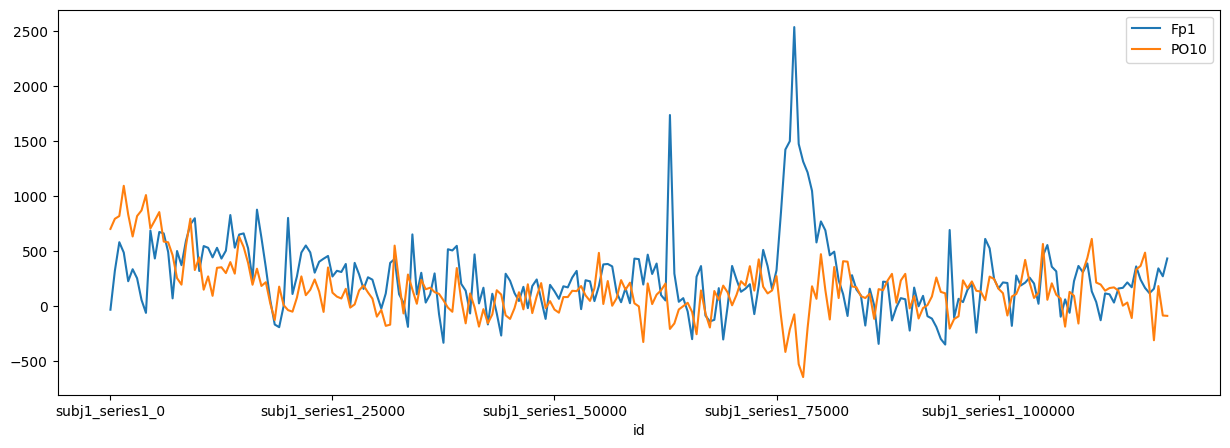

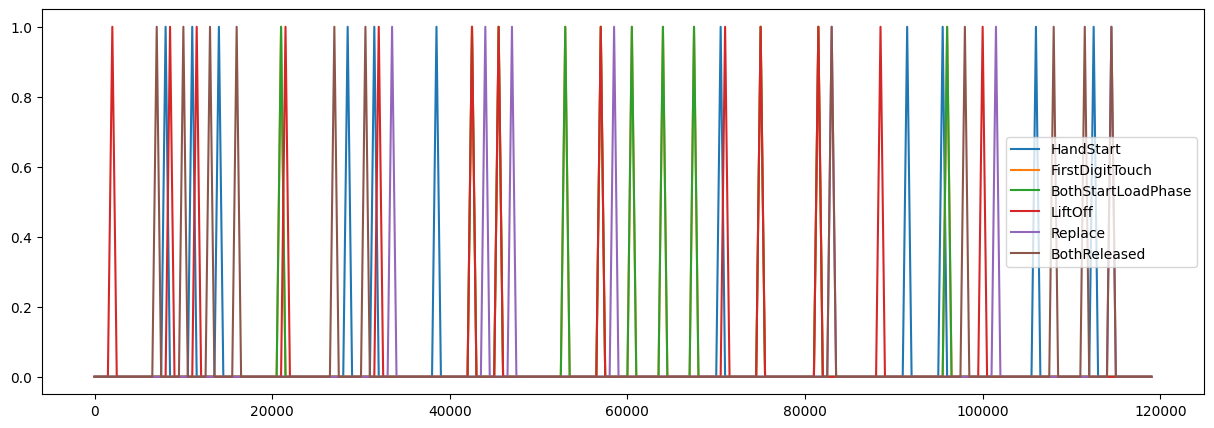

In [ ]:
# Совмещение таймфреймов измеряемых событий и показания двух датчиков, например Fp1 и PO10
train_set_signals.head()
axis = plt.gca()
downSampleToShow = 500
train_set_signals[::downSampleToShow].plot(x="id", y="Fp1", ax=axis)
train_set_signals[::downSampleToShow].plot(x="id", y="PO10", ax=axis, figsize=(15,5))
train_set_labels[::downSampleToShow].plot(figsize=(15,5))
plt.show()

HandStart = red
FirstDigitTouch = purple
BothStartLoadPhase = black
LiftOff = green
Replace = yellow
BothReleased = blue


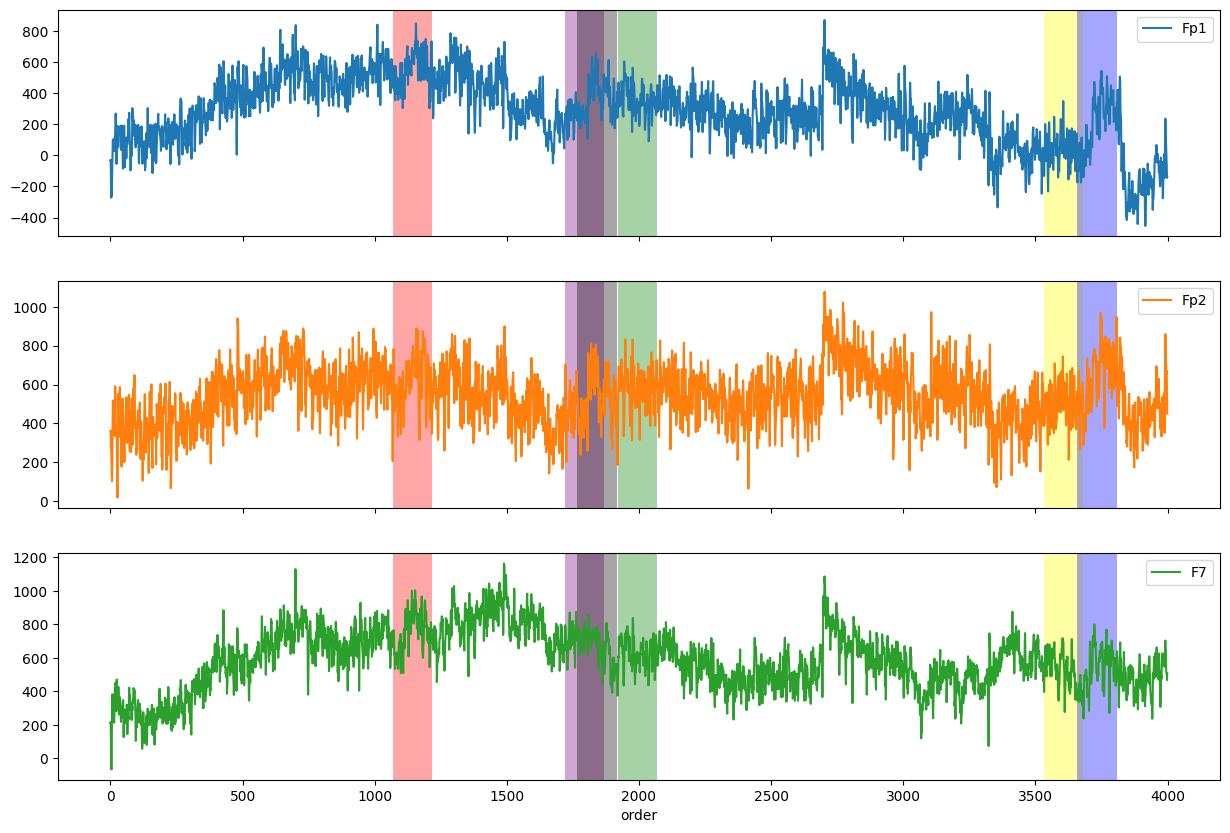

In [ ]:
# Совмещение таймфреймов измеряемых событий и показания датчиков Fp1, Fp2, F7
eeg_channels = train_set_signals.columns.drop('id')
labels = train_set_labels.columns.drop('id')
train_set_complete = pd.concat([train_set_signals,train_set_labels], axis=1)
train_set_complete.insert(0, "order", range(0, len(train_set_complete)))
train_set_complete.head()
def highlight(indices,ax,color):
    i=0
    while i<len(indices):
        ax.axvspan(indices[i]-0.5, indices[i]+0.5, facecolor=color, edgecolor='none', alpha=.35)
        i+=1
secondsToShow = 8
channelsToShow = 3
labelsToShow = 6

sample_set = train_set_complete[train_set_complete["order"] < secondsToShow*500].drop("id", axis=1).set_index("order") #sample rate is 500hz
colors=["red","purple","black","green", "yellow", "blue"]
axes = sample_set.plot(y=eeg_channels[:channelsToShow],subplots=True, figsize=(15,10))
for i in range(0, len(labels)):
    print(labels[i], "=", colors[i])

for axis in axes:
    colorindex = 0
    for label in labels[:labelsToShow]:
        highlight(sample_set[sample_set[label]==1].index, axis, colors[colorindex])
        colorindex = colorindex + 1
plt.show()

# Разведочный анализ
Разведочный анализ данных (Exploratory Data Analysis, EDA) — это важный этап, который поможет лучше понять характеристики и структуру данных. Рассмотрим несколько ключевых аспектов EDA для нашего набора данных ЭЭГ.

Шаги Разведочного Анализа Данных
Статистический Анализ:

Рассчитаем основные статистические показатели (среднее, медиана, стандартное отклонение) для каждого канала ЭЭГ.
Оценим распределение значений в каждом канале.  

Визуализация Данных:
Используем графики (например, гистограммы, ящики с усами) для визуализации распределений значений по каналам ЭЭГ.
Создадим временные графики для отдельных каналов, чтобы увидеть динамику сигналов ЭЭГ во времени.  

Анализ Корреляции:
Рассчитаем корреляции между различными каналами ЭЭГ.
Используем тепловую карту (heatmap) для визуализации матрицы корреляций.  

Анализ Событий:
Исследуем, как распределение сигналов ЭЭГ меняется вокруг времен событий (например, HandStart, LiftOff).

In [ ]:
# Функция для объединения данных и событий
def combine_data_events(data_file, events_file):
    data = pd.read_csv(data_file)
    events = pd.read_csv(events_file)
    combined = pd.merge(data, events, on='id')
    return combined

# Пути к файлам тренировочных данных
train_files = [
    ('/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/train/subj1_series1_data.csv',
     '/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/train/subj1_series1_events.csv'),
    ('/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/train/subj1_series2_data.csv',
     '/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/train/subj1_series2_events.csv'),

    ]

# Объединение тренировочных данных
train_data_combined = pd.concat([combine_data_events(data, events) for data, events in train_files])

# Пути к файлам тестовых данных
test_files = [
    '/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/test/subj1_series9_data.csv',
    '/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/test/subj1_series10_data.csv'
]

# Загрузка и объединение тестовых данных
test_data_combined = pd.concat([pd.read_csv(file) for file in test_files])

# Вывод размеров объединенных данных
print("Размер тренировочного набора данных:", train_data_combined.shape)
print("Размер тестового набора данных:", test_data_combined.shape)


Размер тренировочного набора данных: (391450, 39)
Размер тестового набора данных: (233081, 33)


Тренировочный Набор Данных  
Объединенный тренировочный набор данных содержит 391450 записи и 39 столбцов.  
32 столбца для каналов ЭЭГ.  
6 столбцов для событий (HandStart, FirstDigitTouch, BothStartLoadPhase, LiftOff, Replace, BothReleased).  
1 столбец id.  
Тестовый Набор Данных  
Объединенный тестовый набор данных содержит 233081 записи и 33 столбца.  
32 столбца для каналов ЭЭГ.  
1 столбец id.  

In [ ]:
# Проверка на пропущенные значения
print("Пропущенные значения в тренировочных данных:", train_data_combined.isnull().sum().sum())
print("Пропущенные значения в тестовых данных:", test_data_combined.isnull().sum().sum())

# Стандартизация данных (пример для тренировочных данных)
from sklearn.preprocessing import StandardScaler

# Выбор каналов ЭЭГ для стандартизации train
eeg_columns_train = train_data_combined.columns[1:33] # Предполагая, что первые 32 колонки - это каналы ЭЭГ

# Создание объекта StandardScaler
scaler = StandardScaler()

# Применение стандартизации к каналам ЭЭГ в данных train
train_data_combined[eeg_columns_train] = scaler.fit_transform(train_data_combined[eeg_columns_train])



# Выбор каналов ЭЭГ для стандартизации данных test
eeg_columns_test = test_data_combined.columns[1:33] # Предполагая, что первые 32 колонки - это каналы ЭЭГ

# Используем уже обученный scaler на тренировочных данных, тем самым мы гарантируем, что стандартизация будет выполнена
# с использованием средних значений и стандартных отклонений, вычисленных из тренировочного набора данных.
test_data_combined[eeg_columns_test] = scaler.transform(test_data_combined[eeg_columns_test])


Пропущенные значения в тренировочных данных: 0
Пропущенные значения в тестовых данных: 0


Мы проверили данные на наличие пропущенных значений и убедились, что их нет. Это гарантирует, что данные готовы к дальнейшей обработке и анализу.

In [ ]:
# Статистический анализ
print(train_data_combined.describe())

                Fp1           Fp2            F7            F3            Fz  \
count  3.914500e+05  3.914500e+05  3.914500e+05  3.914500e+05  3.914500e+05   
mean   1.335955e-17  7.551048e-18 -9.293598e-18  3.833609e-17 -6.273178e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -4.193380e+00 -6.907754e+00 -5.195824e+00 -4.206280e+00 -3.587169e+00   
25%   -5.529060e-01 -5.611853e-01 -6.626859e-01 -6.619582e-01 -6.220363e-01   
50%   -1.382734e-01 -1.140105e-01 -4.063633e-03 -3.123642e-02 -2.023346e-02   
75%    3.178225e-01  3.530386e-01  6.454742e-01  5.994854e-01  5.753006e-01   
max    8.392102e+00  8.816235e+00  6.100684e+00  6.627623e+00  4.894489e+00   

                 F4            F8           FC5           FC1           FC2  \
count  3.914500e+05  3.914500e+05  3.914500e+05  3.914500e+05  3.914500e+05   
mean   2.091059e-17 -5.866584e-17  4.094991e-17  1.045530e-17  2.671909e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.

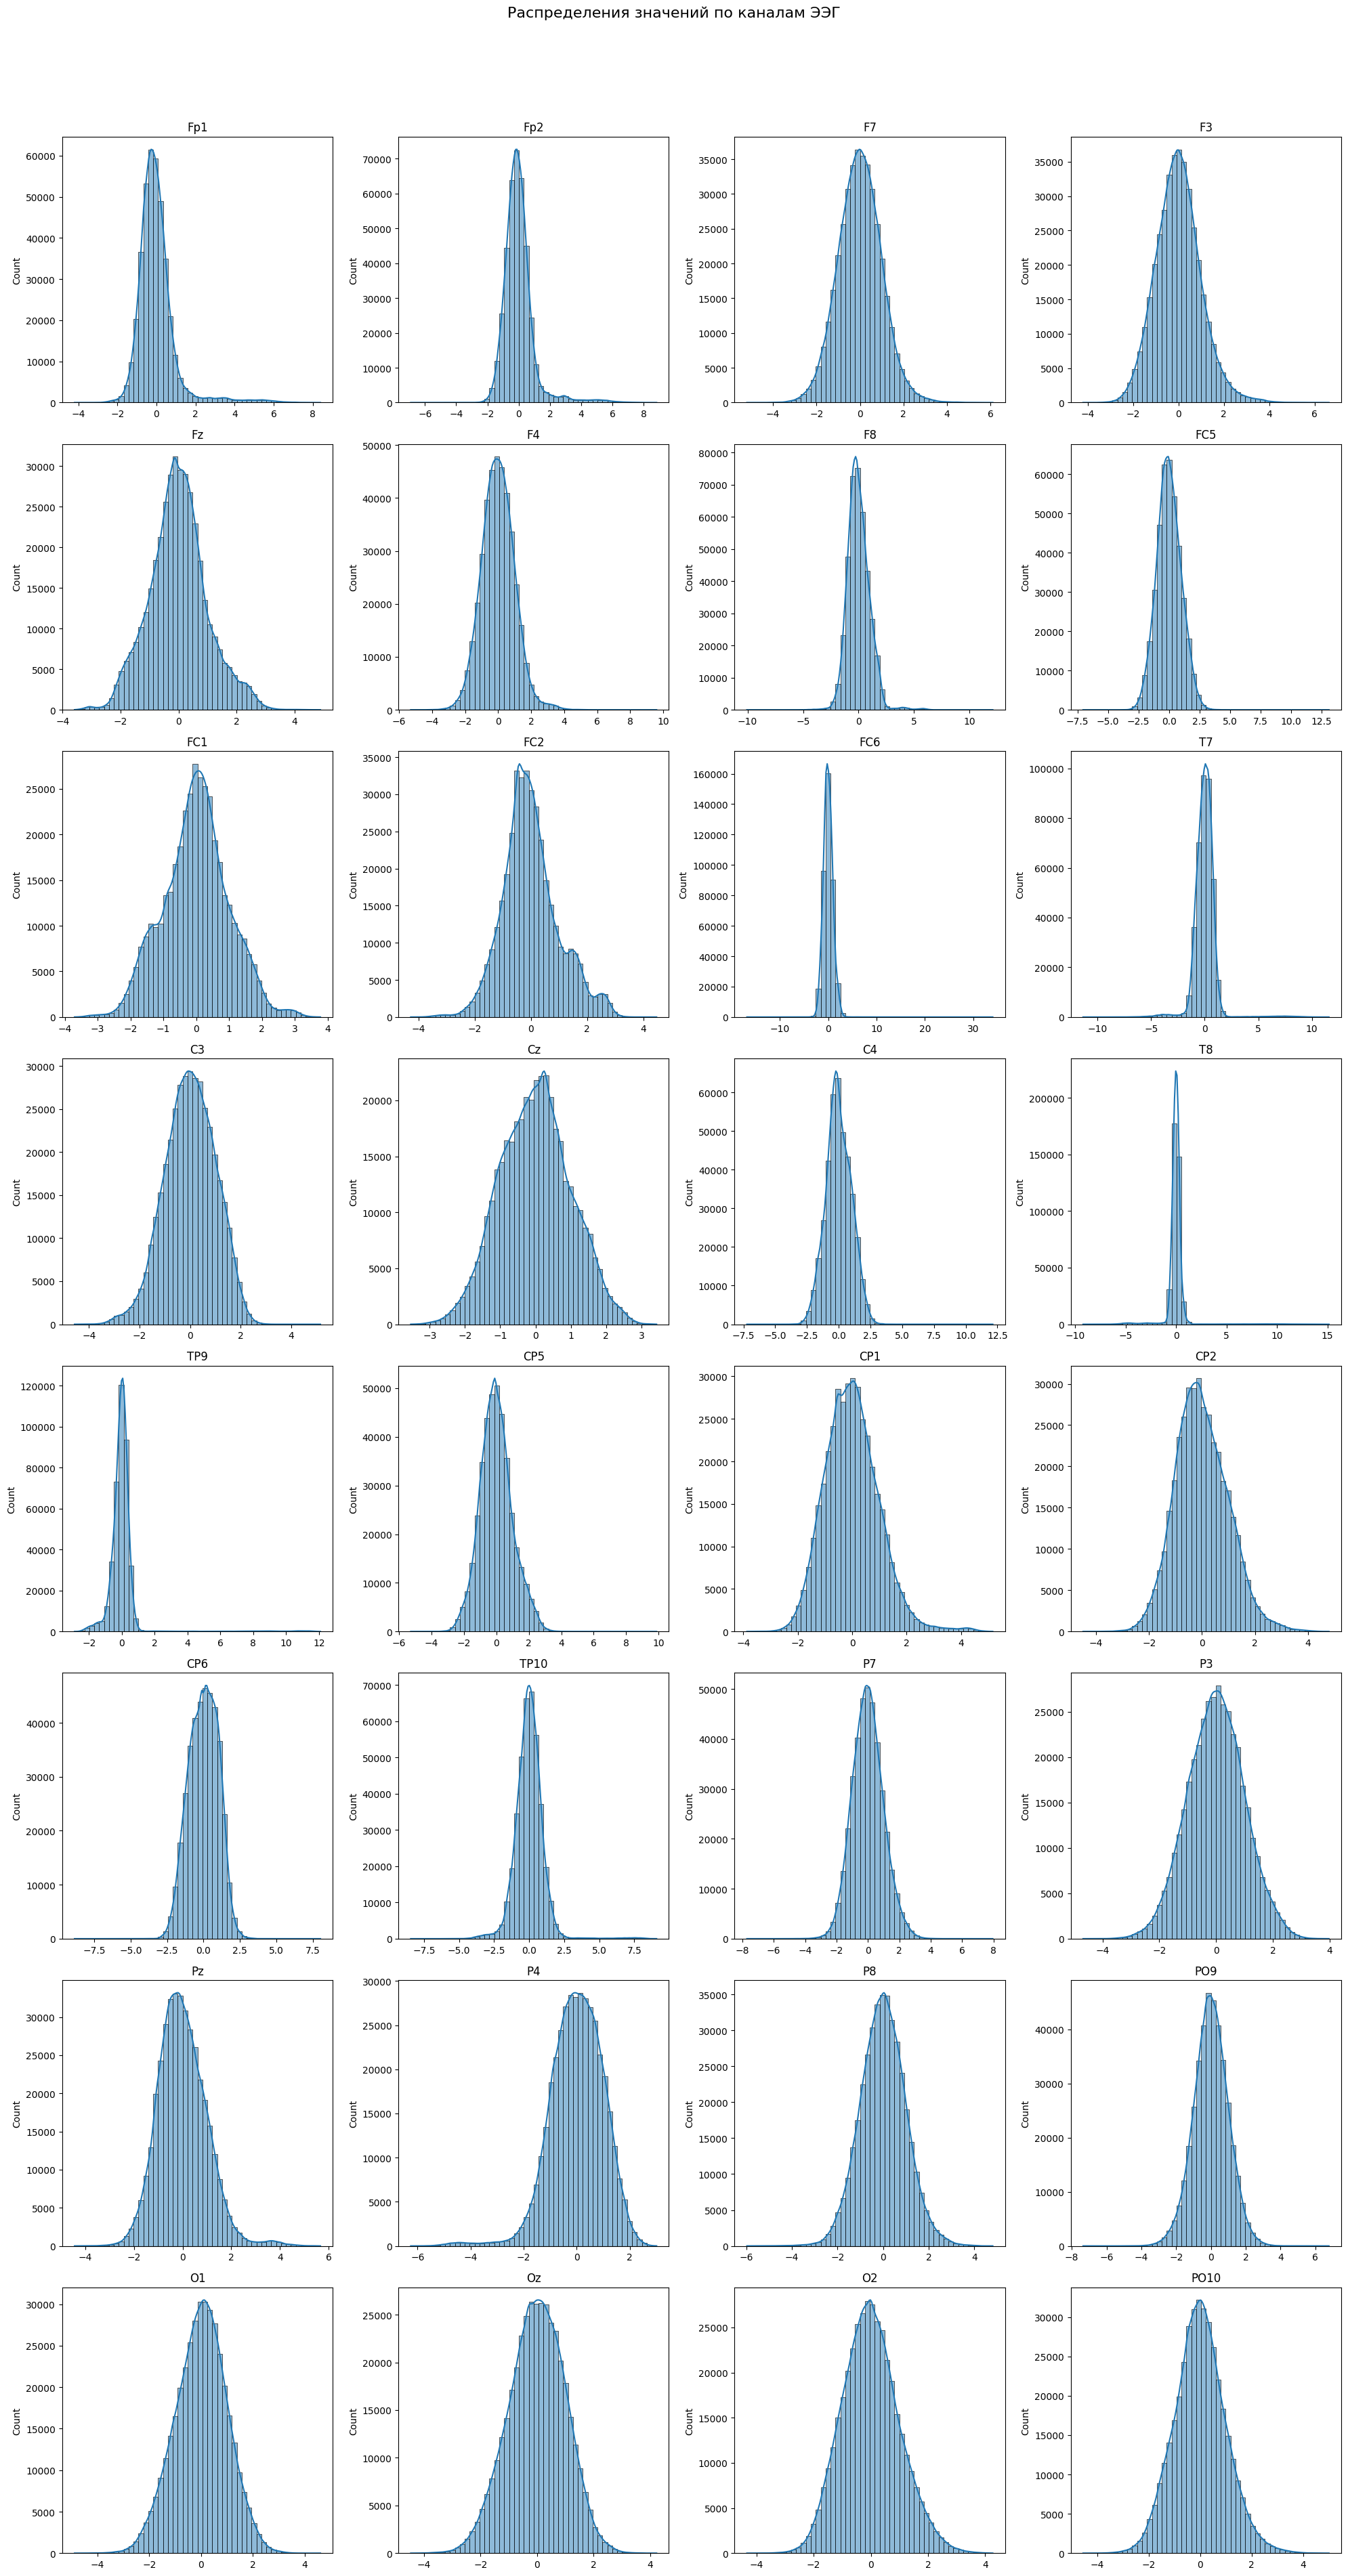

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 40)) # Устанавливает размер общего рисунка
fig.suptitle('Распределения значений по каналам ЭЭГ', fontsize=16)

# Пример для первых 32 каналов
for i, ax in enumerate(axes.flatten()):
    sns.histplot(train_data_combined[train_data_combined.columns[i+1]], bins=50, kde=True, ax=ax)
    ax.set_title(train_data_combined.columns[i+1])
    ax.set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Для корректировки расположения графиков и заголовка
plt.show()


Исходя из предоставленных графиков распределения для каналов ЭЭГ, можно сделать несколько общих наблюдений:  

Нормальность Распределений:  
Графики показывают, что распределения значений ЭЭГ кажутся нормальными (гауссовыми), что является характерным для стандартизированных данных. Это подтверждает, что процесс стандартизации был проведен корректно.  

Однородность Вариации:
Все каналы имеют схожий масштаб вариации, что важно для алгоритмов машинного обучения, чувствительных к масштабу данных.  

Отсутствие Значительных Аномалий:
На графиках не видны значительные выбросы или аномалии, что хорошо для обучения моделей.

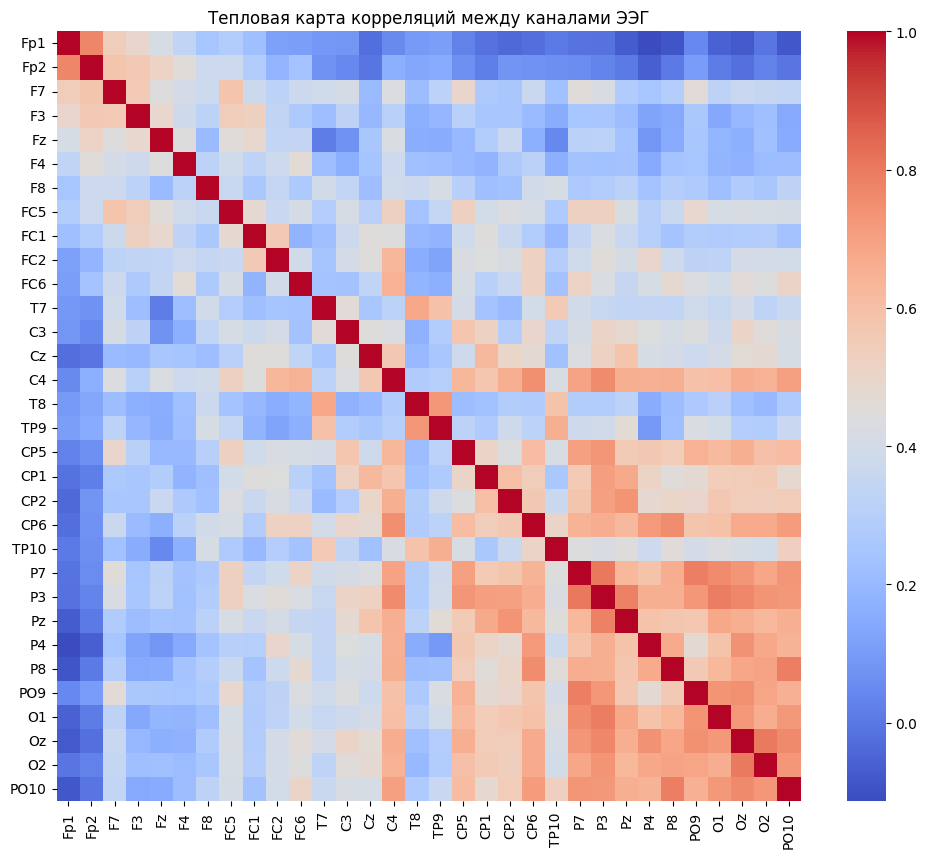

In [ ]:
# Тепловая карта корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(train_data_combined[eeg_columns_train].corr(), annot=False, cmap='coolwarm')
plt.title('Тепловая карта корреляций между каналами ЭЭГ')
plt.show()

Тепловая карта корреляций между каналами ЭЭГ показывает, как каналы связаны друг с другом:  

Сильная Корреляция:  
Наблюдается сильная корреляция между некоторыми каналами, что характерно для соседних электродов, расположенных близко друг к другу на скальпе.  

Потенциал для Извлечения Признаков:  
Такие корреляции могут быть полезны для извлечения признаков, которые учитывают взаимосвязь между каналами.

Визуализация сырых данных ЭЭГ может не дать прямого понимания зависимостей между событиями и ЭЭГ, использование моделей машинного обучения позволит более точно выявлять и интерпретировать такие зависимости. Модели будут учитывать многомерные взаимодействия в данных, которые невозможно увидеть невооруженным глазом на графиках.

#Подготовка данных к моделированию включает в себя несколько важных этапов.   
1. Выбор Признаков и Целей (Feature Selection and Labeling)
Выберем, какие данные будут использоваться в качестве признаков для обучения модели. В нашем случае, это будут столбцы, соответствующие каналам ЭЭГ. Целями же будут столбцы с событиями.

2. Разделение Данных на Обучающие и Тестовые Наборы (Train-Test Split)
Хотя у нас уже есть отдельные тренировочные и тестовые наборы данных, разделим тренировочный набор на подмножества для обучения и валидации.

3. Обработка Временных Рядов (Time-Series Processing)
Если это необходимо, применим методы обработки временных рядов, такие как оконное сглаживание или вычисление скользящего среднего, чтобы сгладить сигналы ЭЭГ.

4. Балансировка Классов (Class Balancing)
Проверим, равномерно ли распределены события в наших данных. Если есть дисбаланс, рассмотрим методы балансировки классов, такие как oversampling минорных классов или undersampling мажорных.

5. Преобразование Формата Данных (Data Formatting)
Убедимся, что данные в правильном формате для модели, которую мы планируем использовать. Например, некоторые модели машинного обучения требуют входных данных в виде массивов NumPy, в то время как другие могут работать с DataFrame Pandas.

# Обучение моделей
Основным требованием к заданию является то, что при прогнозировании нельзя использовать данные из будущего, является критически важным для правильного обучения и оценки моделей машинного обучения, особенно в задачах, связанных с временными рядами, таких как анализ ЭЭГ. Это требование устраняет риск "утечки данных" (data leakage), когда информация из тестового набора непреднамеренно используется в процессе обучения.  

Выбор моделей должен учитывать их способность обрабатывать данные временных рядов, учитывая только прошлую информацию:  

Рекуррентные Нейронные Сети (RNN), включая LSTM и GRU: Эти модели предназначены для работы с последовательностями данных, сохраняя информацию о предыдущих наблюдениях через внутренние состояния.  

1D Сверточные Нейронные Сети (1D CNN): При правильной настройке они могут анализировать временные последовательности, учитывая пространственную иерархию в данных.  

Ансамбли Моделей и Деревья Решений (Random Forest, Gradient Boosting): Хотя эти модели не учитывают временную структуру данных по своей природе, их можно применять, если в качестве признаков используются только данные из прошлого, например, через создание скользящих окон.

# Рекуррентные Нейронные Сети (RNN), включая LSTM и GRU   

Поскольку данные ЭЭГ имеют временную структуру, RNN являются подходящим выбором для анализа таких данных. LSTM (Long Short-Term Memory) и GRU (Gated Recurrent Units) являются расширениями RNN, специально разработанными для работы с долгосрочными зависимостями в данных.  

Почему LSTM или GRU?  
Устранение Проблемы Затухающего Градиента: LSTM и GRU способны запоминать информацию на длительное время, что полезно при работе с временными рядами.
Сохранение Временных Зависимостей: Они могут улавливать временные зависимости в данных, что идеально подходит для анализа ЭЭГ.   

Шаги Обучения:  

Подготовка Последовательностей:  
Преобразуйте данные в формате, пригодный для RNN/LSTM/GRU, например, используя оконное разделение временных рядов.  

Определение Архитектуры Сети:  
Определите архитектуру вашей нейронной сети, включая количество слоев, количество нейронов в каждом слое и параметры такие как dropout для предотвращения переобучения.  

Обучение Модели:  
Используйте обучающий набор данных для тренировки модели.  

Валидация Модели:  
Проверьте производительность модели на валидационном наборе данных.  

Тонкая Настройка и Оптимизация:  
Настройте гиперпараметры и структуру модели для достижения наилучших результатов.  

Заключение:  
RNN, LSTM или GRU предложат более продвинутый подход к анализу ЭЭГ данных благодаря их способности обрабатывать временные зависимости и долгосрочные взаимосвязи в данных. Это может быть особенно полезно для идентификации более сложных шаблонов, связанных с различными состояниями активности мозга.


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Определение размера окна
window_size = 50  # Пример размера окна

# Разделение данных
train_data, val_data = train_test_split(train_data_combined, test_size=0.2, random_state=42)

# Создание генератора
def data_generator(data, features, targets, window_size, batch_size):
    num_samples = len(data) - window_size
    while True:  # Бесконечный цикл для непрерывной подачи данных
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            X = np.zeros((end - start, window_size, len(features)), dtype=np.float32)
            y = np.zeros((end - start, len(targets)), dtype=np.float32)
            for i in range(start, end):
                X[i - start] = data[features].iloc[i-window_size:i].values
                y[i - start] = data[targets].iloc[i].values
            yield X, y
batch_size = 32
# Создание генераторов для обучающих и валидационных данных
train_generator = data_generator(train_data, features, targets, window_size, batch_size)
val_generator = data_generator(val_data, features, targets, window_size, batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Определение архитектуры модели
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, len(features))),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(len(targets), activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:

# Обучение модели
history = model.fit(train_generator, steps_per_epoch=len(train_data)//batch_size, validation_data=val_generator, validation_steps=len(val_data)//batch_size, epochs=10)

ValueError: ignored